# **Obtención y preparación de datos**
# OD05.1-AYUDANTIA Combinaciones Transformaciones Lineales

## <font color='blue'>**Qué es el algebra lineal?**</font>

El **álgebra lineal** es una rama de las matemáticas que estudia conceptos tales como vectores, matrices, espacio dual, sistemas de ecuaciones lineales y, en su enfoque de manera más formal, espacios vectoriales y sus transformaciones lineales.

Es un área activa que tiene conexiones con muchas áreas dentro y fuera de las matemáticas, como el análisis funcional, las ecuaciones diferenciales, la investigación de operaciones, las gráficas por computadora, la ingeniería, etc.

**Es el lenguaje de muchas teorías matemáticas y físicas, machine learning y computación eficiente.**



In [50]:
# Necesitamos versión actualizada de matplotlib
!pip install matplotlib --upgrade

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## <font color='blue'>**Escalares, vectores, matrices y tensores**</font>

Un **escalar** es únicamente un número, a diferencia de la mayoría de los otros elementos del álgebra lineal que son conjuntos de valores como los vectores y matrices.

$$\omega = 12.5$$
$$a = 3$$

Un **vector** es un arreglo de números. Un vector de $n$ componentes se define como un conjunto ordenado de $n$ números. Muchas nociones físicas, tales como las fuerzas, velocidades y aceleraciones, involucran una magnitud (el valor de la fuerza, velocidad o aceleración) y una dirección. Cualquier entidad que involucre magnitud y dirección se llama vector. Los vectores se representan por flechas en las que la longitud de ellas define la magnitud; y la dirección de la flecha representa la dirección del vector. Podemos pensar en los vectores como una serie de números. Éstos números tienen una orden preestablecido, y podemos identificar cada número individual por su índice en ese orden. Los vectores identifican puntos en el espacio, en donde cada elemento representa una coordenada del eje en el espacio. Podemos representarlos es las siguientes formas:

como vectores columna:

$$\vec{x} = \begin{pmatrix}t\\y\\z\\w\end{pmatrix} \qquad \vec{a} = \begin{pmatrix}a_0\\a_1\\a_2\\a_3\end{pmatrix}$$

o como vectores fila:

$$\vec{x} = \begin{pmatrix}t, y, z, w\end{pmatrix} \qquad \vec{a} = \begin{pmatrix}a_0, a_1, a_2, a_3\end{pmatrix}$$

Una **matriz** es un arreglo bidimensional de números. Cada elemento de la misma está identificado por dos índices, en lugar de uno como en los vectores.

$$\mathbf{A} = \begin{pmatrix}a_{0,0} & b_{0,1} & c_{0,2}\\a_{1,0} & b_{1,1} & c_{1,2}\end{pmatrix}\qquad
 \mathbf{B} = \begin{pmatrix}a_{0,0} & b_{0,1}\\a_{1,0} & b_{1,1}\\a_{2,0} & b_{2,1}\end{pmatrix}$$

Existen diversos casos en los cuales se precisan mas de dos ejes para almacenar valores. En el caso general, una matriz con un número regular de ejes se lo conoce como __tensor__ (matriz N-dimensional, con $N > 2$). Por ejemplo, cuando almacenamos los valores de los píxeles de una imagen a color necesitamos una matriz con tres ejes (uno para cada canal de color: R, G y B).

A continuación crearemos cuatro fuciones.
* `planoCartesiano()`, la cual crea un plano cartesiano de dimensiones $n \times n$
* `graficarVectores()` la cual dibuja una lista de  vectores en dicho plano.
* `graficaMatriz()` la cual recibe una matriz de coordenadas que representan una figura en el espacio.
* `lineasTransformacion()` la cual dibuja las líneas paralelas y equidistantes de la Transformación en el Plano Cantesiano

Revíselas y deconstrúyalas hasta entenderlas.

In [52]:
def planoCartesiano(n):
    min, max = -1 * n, n
    fig, ax = plt.subplots(figsize=(6, 6))
    plt.axvline(x=0, color='grey', zorder=0)
    plt.axhline(y=0, color='grey', zorder=0)
    ax.set_xlim(min, max)
    ax.set_ylim(min, max)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    return ax

def graficarVector(vec, origen=[0,0], color='k' , alpha=1):
    x = np.concatenate((origen, vec), axis=None)
    plt.quiver([x[0]],
               [x[1]],
               [x[2] - x[0]],
               [x[3] - x[1]],
               angles='xy', scale_units='xy', scale=1,
               color=color,
               alpha=alpha)

def graficaMatriz(m, color='r', alpha=1, fill=True, scatter= False):
    if scatter: plt.scatter(m[:,0], m[:,1], color=color, s=1, alpha=alpha)
    if fill: plt.fill_between(m[:,0], m[:,1], color=color, linewidth=0, alpha=alpha)

def lineasTransformacion(n, M, verbose=False):
    """
    Esta función dibuja las líneas paralelas y equidistantes de la Transformación
    que impone la matriz M
    """
    # determinamos los puntos en x por los cuales pasaran las paralelas
    x1 = M[1][0]
    x2 = M[2][0]
    y1 = M[1][1]
    y2 = M[2][1]
    if (x1 - x2) == 0:
        for i in range(-n, n+1, M[1][0]):
            plt.axhline(y=i, color="r", linestyle="--", linewidth=0.2, zorder=1)
    else:
        m = ((y1 - y2)/(x1 - x2))
        paso = (- y1 + m*x1) / m
        rango_d = [round(i,2) for i in np.arange(0, 2*n, paso)]
        rango_i = [-i for i in rango_d[1:]]
        rango_x = rango_i + rango_d
        rango_x.sort()
        if verbose: print(f'Rango en x: {rango_x}')
        for i in rango_x:
            plt.axline((i, 0), slope=m, color="r", linestyle="--", linewidth=0.2)
    # determinamos los puntos en y por los cuales pasaran las paralelas
    x1 = M[2][0]
    x2 = M[3][0]
    y1 = M[2][1]
    y2 = M[3][1]
    if (y1 - y2) == 0:
        for i in range(-n, n+1, M[2][1]):
            plt.axvline(x=i, color="r", linestyle="--", linewidth=0.2, zorder=1)
    else:
        m = ((y1 - y2)/(x1 - x2))
        paso = m * (-x1) + y1
        rango_d = [round(i,2) for i in np.arange(0, 2*n, paso)]
        rango_i = [-i for i in rango_d[1:]]
        rango_y = rango_i + rango_d
        rango_y.sort()
        if verbose: print(f'Rango en y: {rango_y}')
        for i in rango_y:
            plt.axline((0, i), slope=m, color="r", linestyle="--", linewidth=0.2)


In [53]:
# Deconstrucción de la función lineasTransformacion()
paso = 1.2
rango_d = [0, 1, 2, 3]
rango_d[1:] # rango_i lo construiremos a partir de los valores de rango_d, menos el
          # el cero y multiplicándolos por -1

[1, 2, 3]

In [54]:
# Deconstrucción de la función lineasTransformacion()
# Creamos un rango de coordinadas de interseccion en cada eje, las cuales son
# equidistantes
n = 3
rango_d = [round(i,2) for i in np.arange(0, 2*n, paso)]
rango_i = [-i for i in rango_d[1:]]
rango = rango_i + rango_d
rango.sort()
rango

[-4.8, -3.6, -2.4, -1.2, 0.0, 1.2, 2.4, 3.6, 4.8]

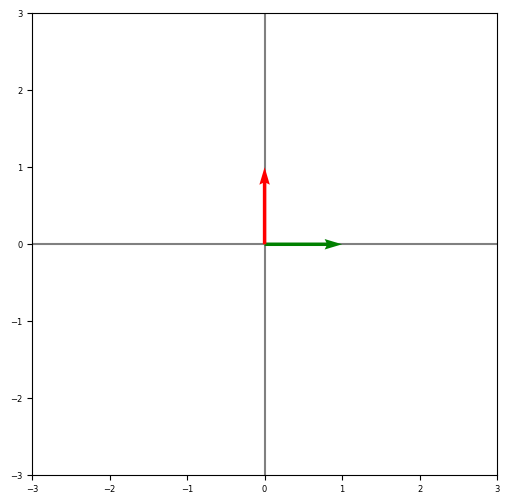

In [55]:
# Ejecutar tal y como está y luego añadir las líneas comentadas

#cuadrado = np.array([[1,1], [2,1], [2,2], [1,2], [1,1]]) - [1,1]
planoCartesiano(3)
i = np.array([1,0])
j = np.array([0,1])
graficarVector(i, color='g')
graficarVector(j, color='r')
#lineasTransformacion(2, cuadrado)

La base canónica de $R^2$ está compuesta por dos vectores, llamados también __versores__.

$$
i = [1,0] \\
j = [0,1]
$$

Integraremos ambos versores en una matriz $M$, la matriz base de nuestro espacio.

In [56]:
M = np.array([[1,0], [0,1]])
M

array([[1, 0],
       [0, 1]])

Si se fijan, M es la matriz identidad. Grafiquémosla.

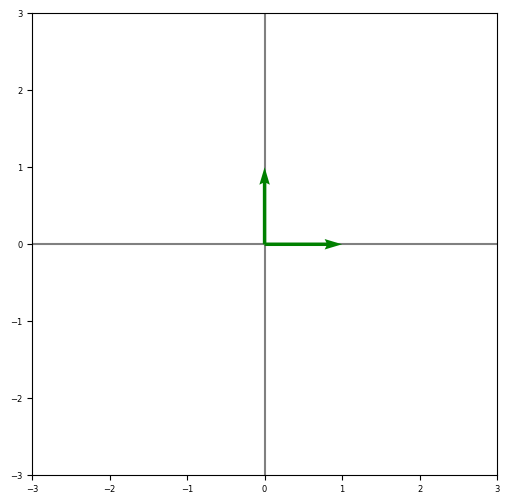

In [57]:
planoCartesiano(3)
graficarVector(M[0], color='green')
graficarVector(M[1], color='green')

Esta es la base que usamos para referirnos a cualquier vector del plano. Por ejemplo:

In [58]:
u = M[0] + M[1]
u

array([1, 1])

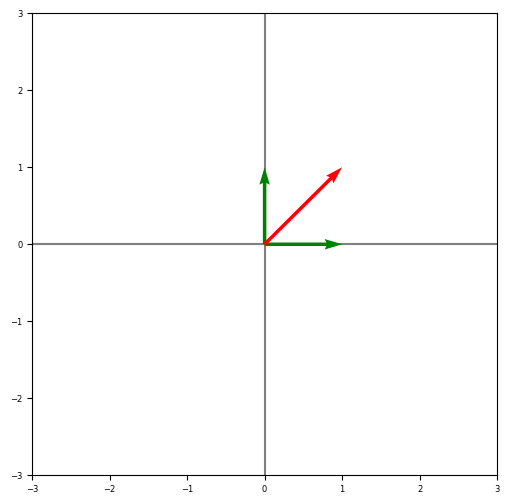

In [59]:
planoCartesiano(3)
graficarVector(M[0], color='green')
graficarVector(M[1], color='green')
graficarVector(u, color='r')

Esto es una __combinación lineal__ de los versores. Si multiplicamos uno de los versores por 0.5, por ejemplo el versor $j$, podemos formar otro vector.

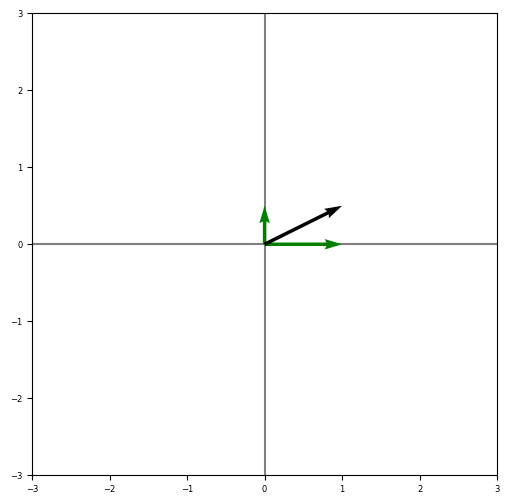

In [60]:
j = M[1] * 0.5
planoCartesiano(3)
graficarVector(M[0], color='green')
graficarVector(j, color='green')
graficarVector((M[0]+j), color='k') # Combinación lineal

O uno negativo

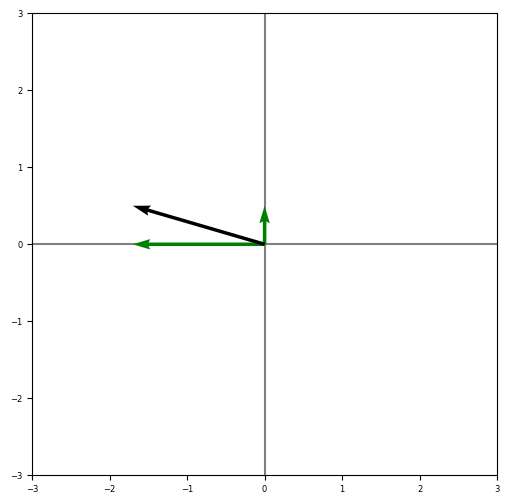

In [61]:
j = M[1] * 0.5
i = M[0] * -1.7
planoCartesiano(3)
graficarVector(i, color='green')
graficarVector(j, color='green')
graficarVector((i+j), color='k') # Combinación lineal

Esto es lo que configura una __Base del Plano__, ya que nos permite encontrar, a través de combinaciones lineales, cualquier vector en ella.

## __Transformaciones lineales__

Definamos ahora una matriz con las coordenadas de un objeto; por ejemplo un cuadrado. Este cuadrado es el que forman nuestros versores de la Base del Plano.

In [62]:
cuadrado = np.array([[1,1], [2,1], [2,2], [1,2], [1,1]]) - [1,1]  # Primero dibujamos el cuadrado desde (1,1)
                                                                  # y luego lo llevamos al origen con -(1,1)
cuadrado

array([[0, 0],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0]])

In [63]:
cuadrado[:,0] # contiene todas las componentes en x de nuestro cuadrado

array([0, 1, 1, 0, 0])

In [64]:
cuadrado[:,1] # contiene todas las componentes en y de nuestro cuadrado

array([0, 0, 1, 1, 0])

Veamos nuestro cuadrado en el plano

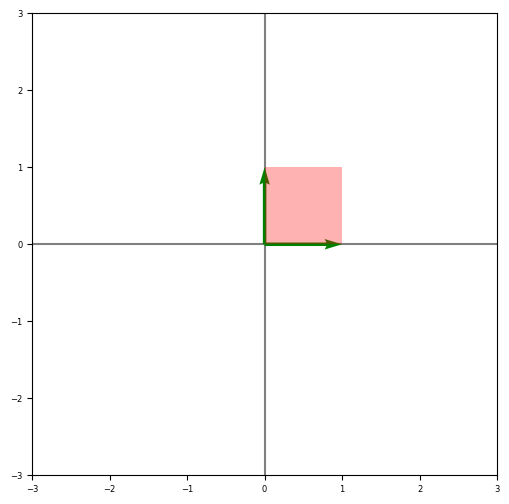

In [65]:
planoCartesiano(3)
graficarVector(M[0], color='green')
graficarVector(M[1], color='green')
graficaMatriz(cuadrado, alpha=0.3)

Apliquemos una transformación lineal a los versores de M

In [66]:
np.array([[1.5, 0],[0, 1.5]])

array([[1.5, 0. ],
       [0. , 1.5]])

In [67]:
np.array([[0, 0.5],[0.5, 0]])

array([[0. , 0.5],
       [0.5, 0. ]])

In [68]:
Mt = M * np.array([[1.5, 0],[0, 1.5]]) + np.array([[0, 0.5],[0.5, 0]])
Mt

array([[1.5, 0.5],
       [0.5, 1.5]])

Esta sería la transformación de nuestro espacio.

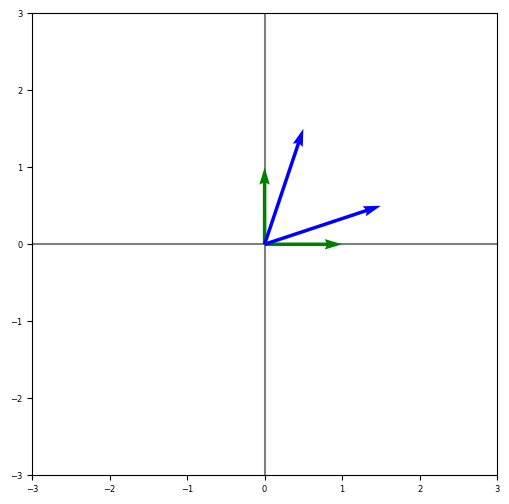

In [69]:
planoCartesiano(3)
graficarVector(M[0], color='green')
graficarVector(M[1], color='green')
graficarVector(Mt[0], color='blue')
graficarVector(Mt[1], color='blue')

In [70]:
cuadrado_t = cuadrado @ Mt
cuadrado_t

array([[0. , 0. ],
       [1.5, 0.5],
       [2. , 2. ],
       [0.5, 1.5],
       [0. , 0. ]])

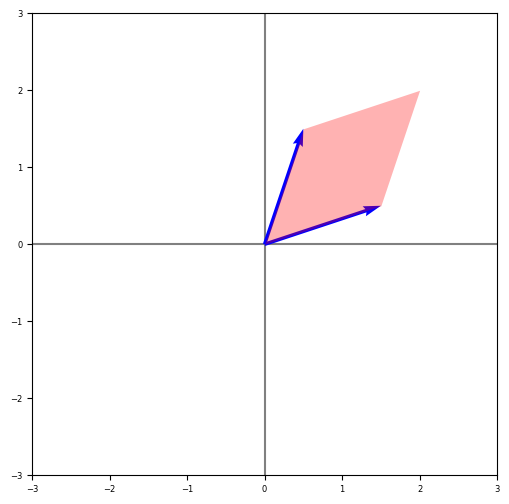

In [71]:
planoCartesiano(3)
graficarVector(Mt[0], color='blue')
graficarVector(Mt[1], color='blue')
graficaMatriz(cuadrado_t, alpha=0.3)

Veamos qué le pasaría a una figura distinta.

In [72]:
import math

circulo = []
radio = 1
for i in range(0,360):
    circulo.append([math.cos(i), math.sin(i)])
circulo = np.array(circulo)


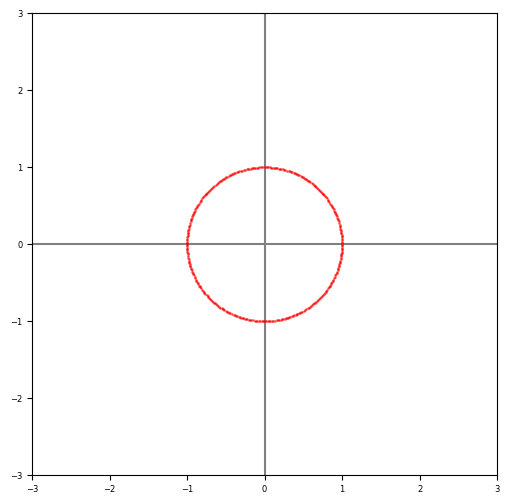

In [73]:
planoCartesiano(3)
graficaMatriz(circulo, color='r', scatter=True, fill=False, alpha=0.5)

Le aplicamos la transformación al círculo.

In [74]:
circulo_t = circulo @ Mt

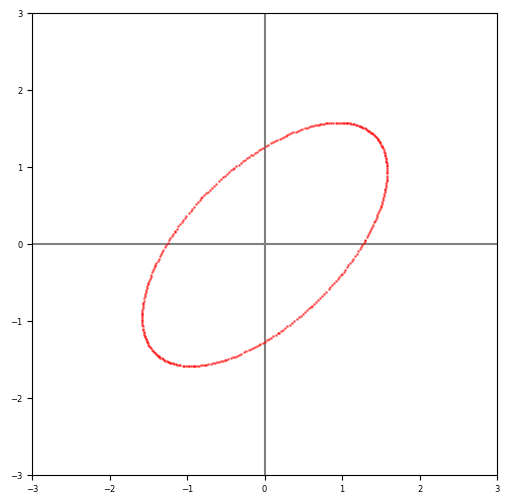

In [75]:
planoCartesiano(3)
graficaMatriz(circulo_t, color='r', scatter=True, fill=False, alpha=0.5)

La nueva área del círculo sometido a la transformacion será:


In [76]:
print (f'Área círculo original = {math.pi * radio **2:3.2f}')
print (f'Área círculo transformado = {math.pi * radio**2 * np.linalg.det(Mt):3.2f}')

Área círculo original = 3.14
Área círculo transformado = 6.28


Y cómo juega el determinante en esto?

In [77]:
# El determinante de M
np.linalg.det(M)

1.0

In [78]:
# El determinante de Mt
np.linalg.det(Mt)

1.9999999999999998

## <font color='green'>Actividad 1</font>

Crea una figura que no sea simétrica, grafícala y luego aplícale una transformación lineal que la invierta en el eje horizontal.

In [79]:
# Tu código aquí ...

# Definición de puntos que forman la letra E
# Cada punto es una tupla (x, y)
letra_E = np.array([
    (1, 4), (3, 4),  # Parte superior horizontal
    (1, 4), (1, 1),  # Parte vertical izquierda
    (1, 2.5), (2, 2.5),  # Parte del medio horizontal
    (1, 1), (3, 1)  # Parte inferior horizontal
])


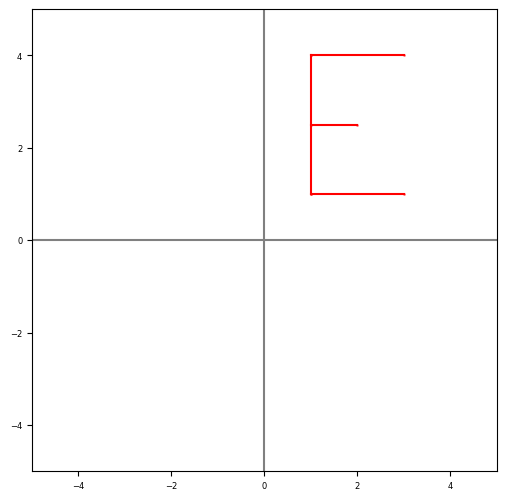

In [80]:
planoCartesiano(5)
graficaMatriz(letra_E, color='r', scatter=True, fill=False, alpha=0.5)
x, y = zip(*letra_E)
for i in range(0, len(letra_E), 2):
    plt.plot(x[i:i+2], y[i:i+2], 'r')  # Dibuja las líneas entre los puntos

In [81]:
# Aplicamos la transformación
M = np.array([[1,0], [0,1]])
Mt = M * np.array([[-0.8,0],[0,0.4]]) + np.array([[0,0.3],[0.5,0]])

letra_Et = letra_E @ Mt

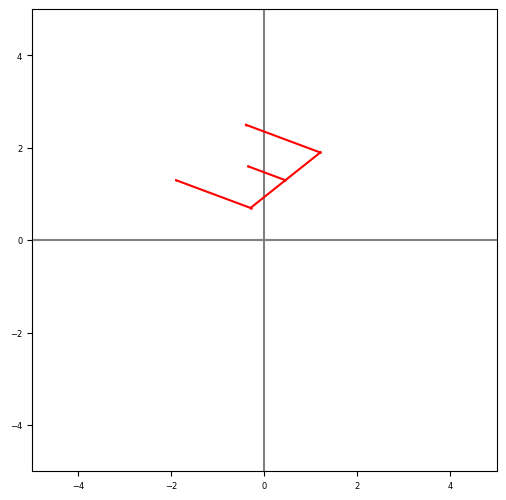

In [82]:
planoCartesiano(5)
graficaMatriz(letra_Et, color='r', scatter=True, fill=False, alpha=0.5)
x, y = zip(*letra_Et)
for i in range(0, len(letra_Et), 2):
    plt.plot(x[i:i+2], y[i:i+2], 'r')  # Dibuja las líneas entre los puntos

<font color='green'>Fin actividad 1</font>

Una __Transformación Lineal__ implica tres cosas:
* El origen no es desplazado después de la transformación
$$T(N) = N$$
* Que las líneas de transformación permanencen paralelas
$$k.T(v) = T(k.v)$$
* Que las líneas de transformación permanencen equidistantes
$$T(v) + T(w) = T(v+w)$$

Donde:<br>
$N$ es el origen<br>
$k$ es un escalar<br>
$v$ y $w$, son vectores<br>
$T(v)$ y $T(w)$ son los transformados de los vectores $v$ y $w$ respectivamente


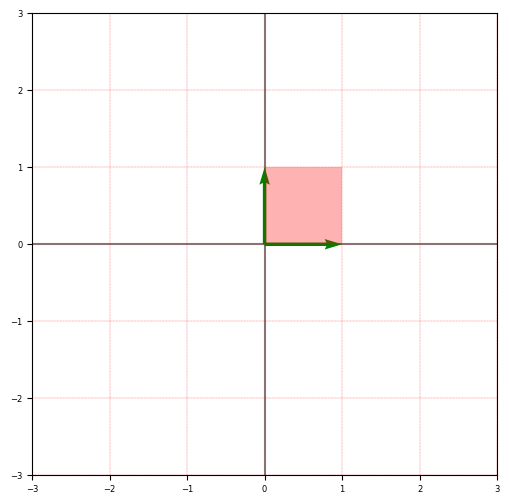

In [83]:
planoCartesiano(3)
graficarVector(M[0], color='green')
graficarVector(M[1], color='green')
graficaMatriz(cuadrado, alpha=0.3)
lineasTransformacion(3, cuadrado)


In [84]:
# Volvamos a nuestra transformación incial ya que la cambiamos intentando rotar la letra
Mt = M * np.array([[1.5, 0],[0, 1.5]]) + np.array([[0, 0.5],[0.5, 0]])
Mt

array([[1.5, 0.5],
       [0.5, 1.5]])

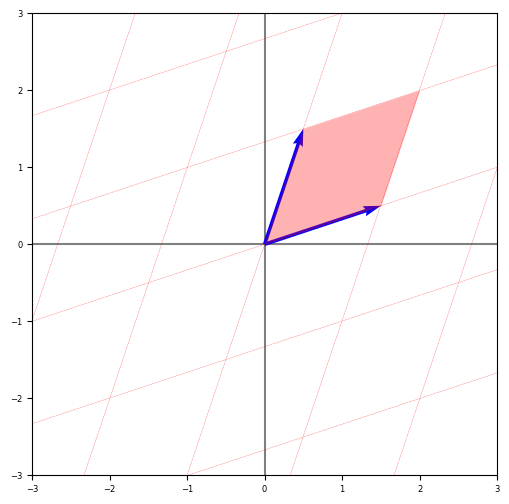

In [85]:
planoCartesiano(3)
graficarVector(Mt[0], color='blue')
graficarVector(Mt[1], color='blue')
graficaMatriz(cuadrado_t, alpha=0.3)
lineasTransformacion(3, cuadrado_t)

## Valores y Vectores Propios
Un __vector propio__ (o __autovector__), es un vector no nulo que, cuando son sometidos a una transformación lineal, dan lugar a un múltiplo escalar ($\lambda $) de sí mismos, con lo que no cambian su dirección. Este escalar $\lambda$ recibe el nombre de __valor propio__ (o __autovalor__).

Simbólicamente lo podemos ver de la siguiente forma:
<br><br>
$$
A\vec{v} = \lambda\vec{v}
$$
Donde:

$A$ es la matriz que representa la transformación de $\vec{v}$<br>
$\vec{v}$ es el vector propio<br>
$\lambda$ es un número que escalar al vector propio<br>

Lo que esta expresión nos dice es que el producto matriz vector $A\vec{v}$ (la transformación del vector $\vec{v}$), da el mismo resultado que simplemente multiplicar el vector $\vec{v}$ por un escalar $\lambda$. Encontrar los valores de $\lambda$ y $\vec{v}$ se reduce a resolver:
<br><br>
$$
(A - \lambda I)\vec{v} = \vec{0}
$$

Esta expresión es cierta si $\vec{v} = \vec{0}$, pero ya dijimos que eso no era lo que buscamos. Del estudio de los determinantes aprendimos que la única forma de lograr que un vector no nulo, multiplicado por una matriz, dé como resultado cero es que el determinante de la matriz (el factor de crecimiento o encogimiento del área) sea 0. Esto es:
<br><br>
$$
det(A - \lambda I) = 0
$$






Tenemos nuestra transformación

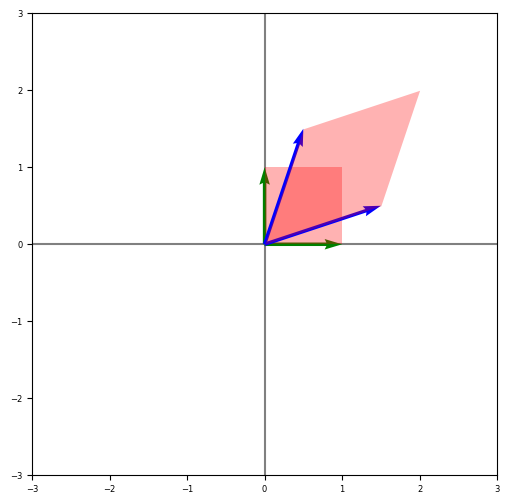

In [86]:
planoCartesiano(3)
graficarVector(M[0], color='green')
graficarVector(M[1], color='green')
graficaMatriz(cuadrado, alpha=0.3)
graficarVector(Mt[0], color='blue')
graficarVector(Mt[1], color='blue')
graficaMatriz(cuadrado_t, alpha=0.3)

Nuestro vector $u$ se transformó en $ut$.

In [87]:
# Nuestro vector u se transformó en ut ahora
ut = Mt[0] + Mt[1]
ut

array([2., 2.])

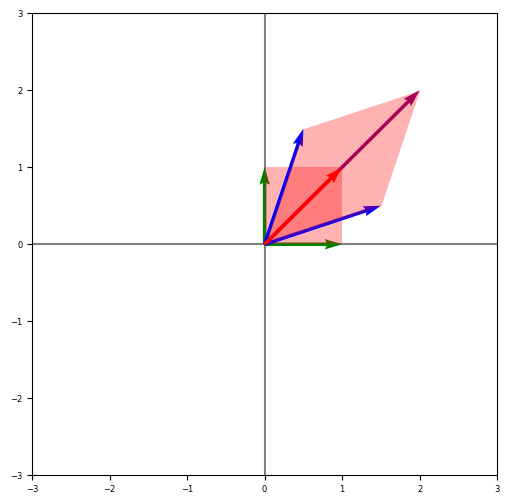

In [88]:
planoCartesiano(3)
graficarVector(M[0], color='green')
graficarVector(M[1], color='green')

graficaMatriz(cuadrado, alpha=0.3)
graficarVector(Mt[0], color='blue')
graficarVector(Mt[1], color='blue')
graficarVector(ut, color='purple')
graficarVector(u, color='red')
graficaMatriz(cuadrado_t, alpha=0.3)

Veamos la norma de $u$ (el vector rojo)

In [89]:
norma_u = np.linalg.norm(u)
norma_u

1.4142135623730951

El vector $u$ transformado, $ut$ (el vector púrpura), corresponde a la suma de los componentes de $Mt$. Veamos su norma.

In [90]:
norma_ut = np.linalg.norm((Mt[0]+Mt[1]))
norma_ut

2.8284271247461903

$ut$ es el doble de $u$

In [91]:
norma_ut / norma_u

2.0

Aquel conjunto de vectores que no sufren cambios en su __direccion__ (el ángulo respecto del eje) después de la transformación, se denominan __Vectores Propios__.

Al factor por el cual se dilatan (o contraen) estos vectores, los llamamos __Valores Propios__.

In [92]:
w, v = np.linalg.eig(Mt)

# w Eigenvalor, v Eigenvector
print(f'Valores propios de Mt:\n{w}\n')
print(f'Vectores propios de Mt:\n\n{v}')

Valores propios de Mt:
[2. 1.]

Vectores propios de Mt:

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Vemos que, en esta caso, hay dos vectores propios y dos valores propios.

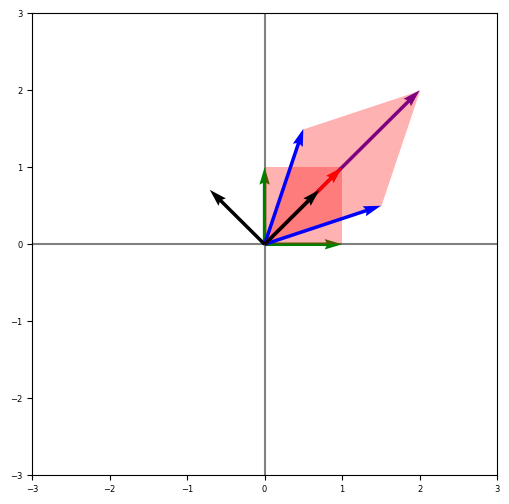

In [93]:
planoCartesiano(3)
graficarVector(M[0], color='green')
graficarVector(M[1], color='green')

graficaMatriz(cuadrado, alpha=0.3)
graficaMatriz(cuadrado_t, alpha=0.3)
graficarVector(Mt[0], color='blue')
graficarVector(Mt[1], color='blue')
graficarVector(ut, color='purple')
graficarVector(u, color='red')

graficarVector(v[:,0], color='k')
graficarVector(v[:,1], color='k')

Los vectores propios (vectores negros), representan a las familias de vectores que no cambian de dirección ni sentido. Lo único que ocurre con ellos es que , los de la derecha se estiran en un factor de 2 con relación a M y los de la izquierda, lo hacen en un factor de 1. Estos dos últimmos factores son los que llamamos valores propios.